# Lab 04: Data Wrangling
Written by Grace Shao

In [1]:
# run this cell
import pandas as pd
import re

So far, you've been given data that has been cleaned for you, ready for analysis. However, data does not come clean. Although data is widely avaliable with the internet, the fruits of API requests and webscraping requires much data wrangling.

In this lab, we'll explore the cultural perception of Zegna's Uomo cologne. An advertisement of this product is below.

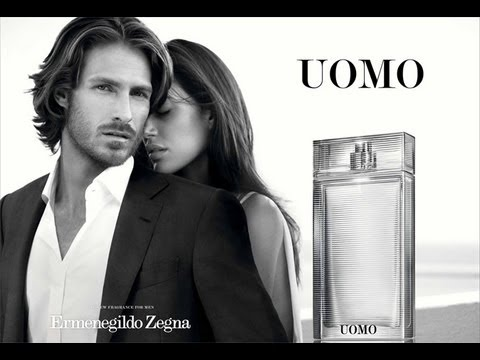

In [2]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=d1_R6gFj_pw
from IPython.display import YouTubeVideo
YouTubeVideo("d1_R6gFj_pw")

This advertisement depicts how Zegna (the producer) wants consumers to interpret Uomo, but how do the actual consumers interpret this product? Let's examine YouTube reviews. Using a third-party API, I've already downloaded the captions of the first 100 videos that come up when you search "Zegna Uomo" on YouTube.

In [3]:
# For the curious: this is how I used youtube_dl to download video information

# import youtube_dl
# import json

# ydl_opts = {'dump_single_json': True, 'writeautomaticsub': True, 'subtitleslangs': ['en']}
# with youtube_dl.YoutubeDL(ydl_opts) as ydl:
#     result = ydl.extract_info("ytsearch100:Zegna Uomo", download=False)

# with open('zegna.json', 'w') as f:
#     json.dump(result, f)

This is the output we get:

In [4]:
zegna = pd.read_json('zegna.json')
zegna.head()

,_type,entries,id,extractor,webpage_url,webpage_url_basename,extractor_key
0,playlist,"{'id': '9gvuLl8D5tw', 'title': 'ZEGNA UOMO - A...",Zegna Uomo,youtube:search,ytsearch100:Zegna Uomo,Zegna Uomo,YoutubeSearch
1,playlist,"{'id': 'v-t9_k_g4GI', 'title': 'Ermenegildo Ze...",Zegna Uomo,youtube:search,ytsearch100:Zegna Uomo,Zegna Uomo,YoutubeSearch
2,playlist,"{'id': 'Otqi2zZrRJM', 'title': 'Uomo Ermenegil...",Zegna Uomo,youtube:search,ytsearch100:Zegna Uomo,Zegna Uomo,YoutubeSearch
3,playlist,"{'id': 'd1_R6gFj_pw', 'title': 'Zegna - UOMO F...",Zegna Uomo,youtube:search,ytsearch100:Zegna Uomo,Zegna Uomo,YoutubeSearch
4,playlist,"{'id': 'KU69nE3U0MQ', 'title': 'ZEGNA UOMO EDT...",Zegna Uomo,youtube:search,ytsearch100:Zegna Uomo,Zegna Uomo,YoutubeSearch


Messy right? Let's figure out what's going on.

#### Question 1
How is this dataset structured?
- What columns are there?
- How many entries are there?
- What type of data is stored in each column?

In [5]:
# code here

#### Question 2
From your exploration, you should have found that the `entries` column is what matters to us. Each value in the column is a dictionary. We should eventually be able to format the 100 dictionaries into a single table, with entries as rows and keys as columns. To check what keys there are in a dictionary, we use `.keys()`, similar to how we use `.columns` with a dataframe.

In [6]:
zegna['entries'][0].keys()

dict_keys(['id', 'title', 'formats', 'thumbnails', 'description', 'upload_date', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 'duration', 'view_count', 'average_rating', 'age_limit', 'webpage_url', 'categories', 'tags', 'is_live', 'automatic_captions', 'subtitles', 'channel', 'extractor', 'webpage_url_basename', 'extractor_key', 'n_entries', 'playlist', 'playlist_id', 'playlist_title', 'playlist_uploader', 'playlist_uploader_id', 'playlist_index', 'thumbnail', 'display_id', 'requested_subtitles', 'requested_formats', 'format', 'format_id', 'width', 'height', 'resolution', 'fps', 'vcodec', 'vbr', 'stretched_ratio', 'acodec', 'abr', 'ext'])

If we want to look at how each video portrays Uomo, we only care about `title`, `description`, `tags`, and `automatic_captions`. Pull these pieces of information out into four separate lists. Consider:
* Not all videos have tags or captions. How will you handle that?
* If we examine the `automatic_captions`, we notice that the information is stored in another dictionary, with keys corresponding to languages (e.g. `en` for English), and each language as a dictionary for a server the captions come from. We want the first URL in the English subtitles.


After you have these four lists, create a dataframe `opinions` with each entry as a row.

In [7]:
# code here
title, description, tags, captions_url = [], [], [], []

for i in zegna['entries']:
    title.append(i['title'])
    description.append(i['description'])

    if 'tags' in i.keys():
        tags.append(i['tags'])
    else:
        tags.append(float('nan'))
    
    if 'automatic_captions' in i.keys():
        captions_url.append(i['automatic_captions']['en'][0]['url'])
    else:
        captions_url.append(float('nan'))

opinions = pd.DataFrame({'title':title,'description':description,'tags':tags,'captions_url':captions_url})

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
title, description, tags, captions_url = [], [], [], []

for i in zegna['entries']:
    title.append(i['title'])
    description.append(i['description'])

    if 'tags' in i.keys():
        tags.append(i['tags'])
    else:
        tags.append(float('nan'))
    
    if 'automatic_captions' in i.keys():
        captions_url.append(i['automatic_captions']['en'][0]['url'])
    else:
        captions_url.append(float('nan'))

opinions = pd.DataFrame({'title':title,'description':description,'tags':tags,'captions_url':captions_url})
</pre>
</details>

#### Question 3
The values of `tags` are in a list. To make it easier to analyze, we need to turn this into a string. Turn the `tags` column that has list entries (with the format `["tag1", "tag2", ...]`) to string entries (with the format `"tag1 tag2 ..."`).


In [8]:
# code here
opinions['tags'] = opinions['tags'].str.join(' ')

<details><summary><button>Click here to reveal the answer!</button></summary>
opinions['tags'] = opinions['tags'].str.join(' ')
</details>

#### Question 4
We're getting closer! This is still quite messy though -- we need to turn the `captions_url` into actual captions. This requires using the `requests` library. I've done this for you, and saved it in a Pandas pickle.

In [7]:
# For the curious: this is how I turned used the URLs to get words.
# This cell takes a second to run.

# import requests

# captions = []
# for url in opinions['captions_url']:
#     try:
#         captions.append(requests.get(url).text)
#     except:
#         captions.append(float('nan'))

# captions.to_pickle('zegna_captions.pkl')


In [22]:
captions = pd.read_pickle('zegna_captions.pkl')
opinions['captions'] = captions

Although I've gotten the text of from the captions URL for you, the captions and descriptions are still quite messy.

Here's an example of a caption we get:

However, there's a pattern to this messiness. Using `regex`, I can use these patterns to clean the text data. Here's a [Regex cheatsheet]('https://www.rexegg.com/regex-quickstart.html') for you.<br><br>
The function `re.sub()` takes the arguments `pattern`, `replacement`, `input_text`.

In [23]:
def remove_tags(text):
    if type(text) != str:
        return float('nan')
    # Join together different components of regex to remove tags and misc. characters
    regex = ''.join([r'(<[^>]+>)', 
                     r'|(&lt;font)', 
                     r'|(color=&quot;)', 
                     r'|(&lt;/font&gt;)', 
                     r'|(#CCCCCC&quot;&gt;)', 
                     r'|(#E5E5E5&quot;&gt;)'
                    ])
    tagless = re.sub(regex, ' ', text)
    tagless = re.sub(r'&amp;#39;', "'", tagless)
    return tagless

In [24]:
opinions['captions'] = opinions['captions'].apply(remove_tags)

Follow my example, and define a function `remove_links` that replaces links with a space. <br><br>
Here are some helpful Regex expressions:
- `\S`: anything that is not a whitespace character
- `+`: one or more

Here's an example using those expressions.

In [25]:
# here is a function that ignores any words that start with "econ"
def dont_talk_abt_econ(introduction):
    return re.sub(r'(econ\S+)', '[REDACTED]', introduction)

adam_smith = "hi my name is adam smith and i am an economist. i'm known for writing the wealth of nations. it's an important economics book. nice to meet you!"
dont_talk_abt_econ(adam_smith)

"hi my name is adam smith and i am an [REDACTED] i'm known for writing the wealth of nations. it's an important [REDACTED] book. nice to meet you!"

In [26]:
# code here

def remove_links(text):
    return re.sub(r'(http\S+)', ' ', text)

opinions['description'] = opinions['description'].apply(remove_links)

<details><summary><button>Give me a hint!</button></summary>
All links start with "http"! How can you use that pattern?
</details>

<details><summary><button>Click here to reveal the answer!</button></summary>
def remove_links(text):
    return re.sub(r'(http\S+)', ' ', text)
</details>

## And you're done! You took in a dataset that could not be analyzed, and now it's ready for analysis!

We've gotten this far; it'd be a shame not to see what we can find...<br>
This is far beyond the scope of 119, text data is still unstructured -- to analyze this, we must further wrangle the data. If you're interested in this, look into natural language processing (NLP).

In [27]:
# !pip install nltk
import nltk
import matplotlib as plt
import string

STOP = set(nltk.corpus.stopwords.words('english')
       + list(string.punctuation)
       + ["amp", "39", "subscribe", "follow",
          "link", "ermenegildo", "zegna", "uomo",
          "music", "applause", "um", "facebook"
         ])

def pos_tag(text):
    '''
    Tags each word in a string with its part-of-speech indicator,
    excluding stop-words and words <= 3 characters
    'I hate this' --> ['i','hate','this']
    '''
    # Tokenize words using nltk.word_tokenize, keeping only those tokens that do
    # not appear in the stop words we defined
    tokens = [i for i in nltk.word_tokenize(text.lower())
                 if (i not in STOP) and (len(i) > 3)]

    # Label parts of speech automatically using NLTK
    pos_tagged = nltk.pos_tag(tokens)
    return pos_tagged

def plot_top_adj(series, data_description, n = 15):
    '''
    Plots the top `n` adjectives in a Pandas series of strings.
    '''
    # Apply part of Speech tagger that we wrote above to any Pandas series that
    # pass into the function
    pos_tagged = series.apply(pos_tag)

    # Extend list so that it contains all words/parts of speech for all captions
    pos_tagged_full = []
    for i in pos_tagged:
        pos_tagged_full.extend(i)

    # Create Frequency Distribution of diff adjectives and plot distribution
    fd = nltk.FreqDist(word + "/" + tag for (word, tag) in pos_tagged_full
                           if tag[:2] == 'JJ')
    fd.plot(n, title='Top {} Adjectives for '.format(n) + data_description);
    return


In [28]:
opinions.dropna(inplace=True)

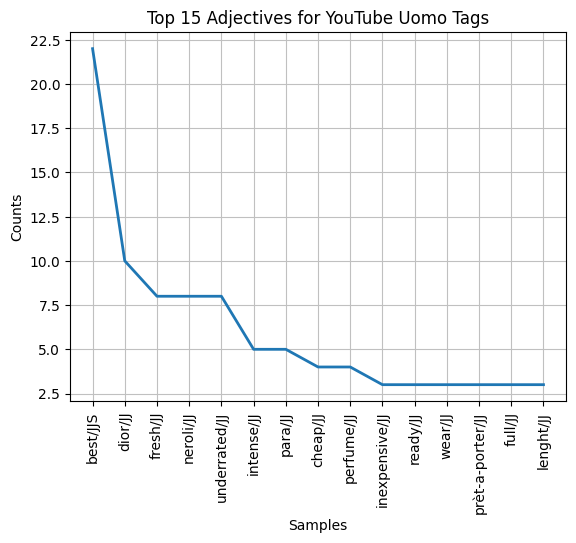

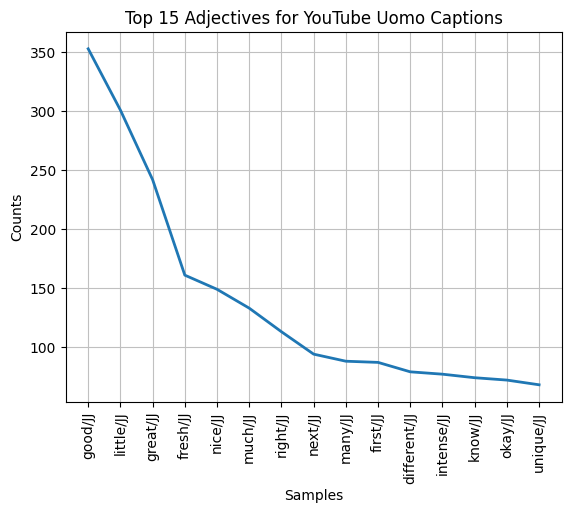

In [29]:
plot_top_adj(opinions['tags'], 'YouTube Uomo Tags')
plot_top_adj(opinions['captions'], 'YouTube Uomo Captions')

Acknowledgements: This lab was based on a demonstration from MACS40400. 